In [19]:
import datetime
import requests
from io import BytesIO

import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
from PIL import Image

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor


pd.set_option('display.max_columns', None)

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/·Ñã·Ö≤·Ñê·Ö≤·Ñá·Ö≥ ·Ñê·Ö≥·ÑÖ·Ö¶·Ü´·ÑÉ·Ö≥ ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/KR_youtube_trending_data_0506.csv')
raw_data.head()

video_id                                             title  \
0  uq5LClQN3cE                                       ÏïàÎÖïÌïòÏÑ∏Ïöî Î≥¥Í≤∏ÏûÖÎãàÎã§   
1  I-ZbZCHsHD0                                Î∂ÄÎùΩÌÜ†Ïä§Ïùò Í≥ÑÌöç [Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ]   
2  9d7jNUjBoss                                   ÌèâÏÉù Î∞òÏÑ±ÌïòÎ©¥ÏÑú ÏÇ¥Í≤†ÏäµÎãàÎã§.   
3  3pI_L3-sMVg                              ·Ñã·Ö°·Ü´·ÑÇ·Öß·Üº·Ñí·Ö°·Ñâ·Ö¶·Ñã·Ö≠ ÍΩàÎöúÎ£πÏûÖÎãàÎã§.   
4  zrsBjYukE8s  Î∞ïÏßÑÏòÅ (J.Y. Park) When We Disco (Duet with ÏÑ†ÎØ∏) M/V   

            publishedAt                 channelId       channelTitle  \
0  2020-08-09T09:32:48Z  UCu9BCtGIEr73LXZsKmoujKw              Î≥¥Í≤∏ BK   
1  2020-08-12T09:00:08Z  UCRuSxVu4iqTK5kCh90ntAgA                Ï¥ùÎ™áÎ™Ö   
2  2020-08-10T09:54:13Z  UCMVC92EOs9yDJG5JS-CMesQ        ÏñëÌå° YangPang   
3  2020-08-11T15:00:58Z  UCkQCwnkQfgSuPTTnw_Y7v7w      ÍΩàÎöúÎ£π Quaddurup   
4  2020-08-11T09:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg  JYP Entertainment   

   categoryId         trending_date  \
0          24  2020-08-12T00:00:00Z   
1           1  2020-08-12T00:00:00Z   
2          22  2020-08-12T00:00:00Z   
3          24  2020-08-12T00:00:00Z   
4          10  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0                                          Î≥¥Í≤∏|bokyem     5947503   53326   
1                Ï¥ùÎ™áÎ™Ö|Ïû¨Î∞åÎäî ÎßåÌôî|Î∂ÄÎùΩÌÜ†Ïä§|Î£®ÏãúÌçº|Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ|Ï¥ùÎ™áÎ™Ö Ïä§ÌÜ†Î¶¨      963384   28244   
2  ÏñëÌå°|ÏñëÌå°Ïú†ÌäúÎ∏å|Ìå°ÌäúÎ∏å|Í∞ÄÏ°±ÏãúÌä∏ÏΩ§|ÏñëÌå°Í∞ÄÏ°±|ÏñëÌå°Í∞ÄÏ°±ÏãúÌä∏ÏΩ§|ÏñëÌå°Ïñ∏Îãà|ÌòÑÏã§ÎÇ®Îß§|ÌòÑÏã§ÏûêÎß§...     2950885   17974   
3  ÍΩàÎöúÎ£π|ÌïúÍµ≠Ïó¨ÌñâÍ∏∞|quaddurup|ÎöúÎ£πÏù¥|korea|southkorea|vlog|...     1743374   36893   
4  JYP Entertainment|JYP|J.Y.Park|JYPark|Î∞ïÏßÑÏòÅ|ÏÑ†ÎØ∏|S...     3433885  353337   

   dislikes  comment_count                                  thumbnail_link  \
0    105756         139946  https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg   
1       494           3339  https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg   
2     68898          50688  https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg   
3      1798           8751  https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg   
4      9763          23405  https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  
0                                                NaN  
1  Ïò§ÎäòÎèÑ Ï†ïÎßê Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§!!Ï¥ùÎ™áÎ™Ö Ïä§ÌäúÎîîÏò§ - Ï¥ùÎ™áÎ™Ö, Ïã≠Ï†úÍ≥±, 5GÎØº, MOVEÌòÅ...  
2                                                NaN  
3                ÏïûÏúºÎ°ú Ï¢Ä Îçî ÍπîÎÅîÌïú ÏòÅÏÉÅÏ†úÏûë ÏïΩÏÜç ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§.Îäò Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§  
4  MelOn http://kko.to/TWyXd7zYjSpotify https://s...

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124354 entries, 0 to 124353
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           124354 non-null  object
 1   title              124354 non-null  object
 2   publishedAt        124354 non-null  object
 3   channelId          124354 non-null  object
 4   channelTitle       124354 non-null  object
 5   categoryId         124354 non-null  int64 
 6   trending_date      124354 non-null  object
 7   tags               124354 non-null  object
 8   view_count         124354 non-null  int64 
 9   likes              124354 non-null  int64 
 10  dislikes           124354 non-null  int64 
 11  comment_count      124354 non-null  int64 
 12  thumbnail_link     124354 non-null  object
 13  comments_disabled  124354 non-null  bool  
 14  ratings_disabled   124354 non-null  bool  
 15  description        120933 non-null  object
dtypes: bool(2), int64(5)

In [4]:
raw_data.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          3421
dtype: int64

In [5]:
raw_data['comments_disabled'][raw_data['comments_disabled'] == True].sum()

600

In [6]:
raw_data['ratings_disabled'][raw_data['ratings_disabled'] == True].sum()

1830

In [7]:
for i in list(raw_data):
    print(i)
    print(raw_data[i].duplicated().value_counts())
    print('\n')

video_id
True     108738
False     15616
Name: video_id, dtype: int64


title
True     107673
False     16681
Name: title, dtype: int64


publishedAt
True     108957
False     15397
Name: publishedAt, dtype: int64


channelId
True     121581
False      2773
Name: channelId, dtype: int64


channelTitle
True     121419
False      2935
Name: channelTitle, dtype: int64


categoryId
True     124339
False        15
Name: categoryId, dtype: int64


trending_date
True     123737
False       617
Name: trending_date, dtype: int64


tags
True     112861
False     11493
Name: tags, dtype: int64


view_count
False    120035
True       4319
Name: view_count, dtype: int64


likes
True     74028
False    50326
Name: likes, dtype: int64


dislikes
True     117479
False      6875
Name: dislikes, dtype: int64


comment_count
True     107346
False     17008
Name: comment_count, dtype: int64


thumbnail_link
True     108738
False     15616
Name: thumbnail_link, dtype: int64


comments_disabled
True     124

In [8]:
df = raw_data[(raw_data['comments_disabled'] != 1) & (raw_data['ratings_disabled'] != 1) & (raw_data['categoryId'] == 23)].copy()

In [9]:
df

video_id                                              title  \
8       7FOi40uehC4                      ÏßëÏóê ÌòºÏûê ÏûàÏùÑ Îïå ÌïòÎäî Ïßì„Öã„Öã„Öã„Öã„Öã„Öã„Öã [Î∞çÍº¨Î∞úÎûÑ]   
9       0dsnm3n6ZdM              Ï†ïÏú§Ìò∏Í∞Ä Î¨¥Î†§ 6ÏãúÍ∞Ñ Í≥µÎì§Ïó¨ ÎßåÎì† ÏÑ∏Í∏∞Ïùò Î∞úÎ™ÖÌíà [Î∞úÎ™ÖÏôï] Ep.1   
11      7Y8Vv_KHp7I  üá∫üá≤üá™üá∏SUB] [Î™∞Ïπ¥] ÎàÑÍ∞ÄÎ¥êÎèÑ Í∞ïÎèÑÏù∏Îç∞ Ï†ÑÌòÄ ÏùòÏã¨ÏùÑ ÏïàÌïòÎäî ÏßÅÏõêÏùÑ Î≥∏Îã§Î©¥?!!!...   
25      2ErtcO2XuYs                                     ÏûêÏàò ÌïòÍ≤†ÏäµÎãàÎã§ Ï£ÑÏÜ°Ìï©ÎãàÎã§   
27      5UahGcQ5u9k                     ÏπòÌÇ® Î≥∏ÏÇ¨ Ï≥êÎì§Ïñ¥Í∞ÄÏÑú ÎÑ§Í≥†Ìï¥ÏôîÏäµÎãàÎã§ [ÎÑ§Í≥†Ïôï] Ep.1   
...             ...                                                ...   
124279  OcE_DzYE_AM                                       ÏÜåÏö∏Î¶¨Ïä§Ï¢å Î≥∏Ï∫ê ÍπÄÌïúÎÇò   
124299  C_a_ZgyQYhU                                     [ÍøàÌÉàÏ∂ú] ÏßàÌà¨Ïùò Íøà 2Ìôî   
124314  JPaubSOSxeM                                 Ïò§Îäò ÏàòÏ†ïÏù¥ÎÑ§ ÏßëÏóêÏÑú ÏûêÍ≥† Í∞ÄÎ†§Í≥†   
124322  XW-7tsRtCEo                         [Î∞•Î¨µÏûê] ÎØ∏Ïö¥ ÏÉàÎÅº (feat. ÍπÄÏßÄÎØº ÎÇ®Ïπú)   
124351  j1iMjfCn9yo                 ÎåÄ~Ï∂© ÏùòÏöïÏóÜÏù¥ Ï°∞ÏßÄÎäî ÎåÄ~Ï∂©ÏÇ¥Ïûê Ï±åÎ¶∞ÏßÄ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   

                 publishedAt                 channelId channelTitle  \
8       2020-08-12T09:00:02Z  UCCJkwrmhIqWkSFV-sQol4Qw  Î∞çÍº¨Î∞úÎûÑMingggo   
9       2020-08-11T09:30:00Z  UC0SoPwEH3idvemSDvKaYgGA       Îã¨ÎùºÏä§ÌäúÎîîÏò§   
11      2020-08-09T11:30:01Z  UCIuFnJrRwHEUcIVtozJnUGA         ÎèôÎÑ§ÎÜàÎì§   
25      2020-08-10T12:50:44Z  UCg_lS-XS9Fh9I6Rl56Z8fpg  ÏµúÍ≥†Îã§ÏúΩÎ∞ïEUGBAK   
27      2020-08-07T09:30:00Z  UC0SoPwEH3idvemSDvKaYgGA       Îã¨ÎùºÏä§ÌäúÎîîÏò§   
...                      ...                       ...          ...   
124279  2022-04-27T09:00:11Z  UCILgj-Cl3aneZBoK3l_gasw          Ìã∞ÌÉÄÎÇ®   
124299  2022-04-29T06:00:04Z  UCZ0dIs-Ao2v8eZF4WOYH5uw  Ïç∞Î†àÏûÑ Ssuleim   
124314  2022-04-23T09:00:07Z  UCXEKwWflysXu312NmIP_dlw          ÎÑàÎçúÌä∏   
124322  2022-04-23T12:00:16Z  UCSc2DcSzzjHgBn8Hg0KG7PA          Íº∞ÎåÄÌù¨   
124351  2022-04-24T10:02:40Z  UC9ZLv1m7QDLv991X1-p50AA          Î≥¥Î¨ºÏÑ¨   

        categoryId         trending_date  \
8               23  2020-08-12T00:00:00Z   
9               23  2020-08-12T00:00:00Z   
11              23  2020-08-12T00:00:00Z   
25              23  2020-08-12T00:00:00Z   
27              23  2020-08-12T00:00:00Z   
...            ...                   ...   
124279          23  2022-05-06T00:00:00Z   
124299          23  2022-05-06T00:00:00Z   
124314          23  2022-05-06T00:00:00Z   
124322          23  2022-05-06T00:00:00Z   
124351          23  2022-05-06T00:00:00Z   

                                                     tags  view_count   likes  \
8       Î∞çÍº¨Î∞úÎûÑ|Î∞çÍº¨|Íº¨Î∞ç|Î∞úÎûÑ|Î™®ÏïÑÎ≥¥Í∏∞|Ïù¥Ïñ¥Î≥¥Í∏∞|Ï†ïÏ£ºÌñâ|ÍøÄÏûº|ÍøÄÌåÅ|Ïú†Ìòï|Ïú†ÌòïÎ≥Ñ|Íº≠ÏûàÎäîÏú†Ìòï...      340149   13166   
9          ÏòàÎä•|Îã¨ÎùºÏä§ÌäúÎîîÏò§|DALLA|Ï†ïÏú§Ìò∏|Î∞úÎ™ÖÏôï|Ïú†ÎÖ∏Ïú§Ìò∏|ÎèôÎ∞©Ïã†Í∏∞|TVXQ|Ïã†Î∞ú|ÏïÑÏù¥ÎîîÏñ¥      351264   11125   
11      Í¥ÄÏ∞∞|Í¥ÄÏ∞∞Ïπ¥Î©îÎùº|Ïã§Ìóò|Ïã§ÌóòÏπ¥Î©îÎùº|prank|prankcam|prankcamera|p...     1354418   21632   
25      ÏµúÍ≥†Îã§ÏúΩÎ∞ï|ÏûêÏó∞Ïù∏|Î∞îÎã§|ÎÇöÏãú|ÏöîÎ¶¨Î®πÎ∞©|ÏãúÍ≥®|ÏïÑÌîÑÎ¶¨Ïπ¥TV|Íµ≠ÎØºÎ∞îÎ≥¥|eugbak|muk...     1118238   32497   
27                             ÏòàÎä•|Îã¨ÎùºÏä§ÌäúÎîîÏò§|DALLA|ÏπòÌÇ®|ÎπÑÎπÑÌÅê|BBQ     2963213  166050   
...                                                   ...         ...     ...   
124279  ÏóêÎ≤ÑÎûúÎìú|Ìã∞ÌÉÄÎÇ®|ÏïÑÎßàÏ°¥|Ìã∞ÏùµÏä§ÌîÑÎ†àÏä§|ÏïÑÎßàÏ°¥ÏùµÏä§ÌîÑÎ†àÏä§|ÏïåÎ∞î|Ïñ¥Ìä∏ÎûôÏÖò|ÏßÅÏõê|ÏóêÎ≤ÑÎûúÎìúÏßÅÏõê...      827472    9404   
124299  ÍøàÌÉàÏ∂ú|ÍøàÏï†ÎãàÎ©îÏù¥ÏÖò|ÍøàÏùòÏã†|ÌÉàÏ∂úÍøà|ÍøàÏï†Îãà|Ïç∞Î†àÏûÑ|Ïç∞Î†àÌà∞|ÏòÅÏÉÅÌà∞|Ïú†ÌäúÎ∏åÏï†Îãà|Ïú†ÌäúÎ∏åÏï†Îãà...      172865    2987   
124314                                             [None]     4052235   80111   
124322                   Íº∞ÎåÄÌù¨|ÍπÄÎåÄÌù¨|Î∞•Î¨µÏûê|Ïû•ÎèôÎØº|Ïã†Î¥âÏÑ†|Ïú†ÏÑ∏Ïú§|Í∞úÏΩò|Í∞úÏΩòÎ†àÏ†ÑÎìú     182207

In [10]:
print('Before dropna:', len(df))
df = df.dropna()
print('After dropna:', len(df))
df = df.reset_index(drop=True)

Before dropna: 7800
After dropna: 6977


In [11]:
df['publish_date'] = df['publishedAt'].apply(lambda x: x.split('T')[0])
df['publish_date'] = df['publish_date'].astype('datetime64[ns]')

df['trend_date'] = df['trending_date'].apply(lambda x: x.split('T')[0])
df['trend_date'] = df['trend_date'].astype('datetime64[ns]')

In [12]:
print(df['publish_date'][:1])
print(df['publish_date'][-1:])

0   2020-08-12
Name: publish_date, dtype: datetime64[ns]
6976   2022-04-24
Name: publish_date, dtype: datetime64[ns]


In [13]:
print(df['trend_date'][:1])
print(df['trend_date'][-1:])

0   2020-08-12
Name: trend_date, dtype: datetime64[ns]
6976   2022-05-06
Name: trend_date, dtype: datetime64[ns]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6977 entries, 0 to 6976
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           6977 non-null   object        
 1   title              6977 non-null   object        
 2   publishedAt        6977 non-null   object        
 3   channelId          6977 non-null   object        
 4   channelTitle       6977 non-null   object        
 5   categoryId         6977 non-null   int64         
 6   trending_date      6977 non-null   object        
 7   tags               6977 non-null   object        
 8   view_count         6977 non-null   int64         
 9   likes              6977 non-null   int64         
 10  dislikes           6977 non-null   int64         
 11  comment_count      6977 non-null   int64         
 12  thumbnail_link     6977 non-null   object        
 13  comments_disabled  6977 non-null   bool          
 14  ratings_

In [15]:
df.shape

(6977, 18)

In [16]:
len(df[df['trend_date'] >= '2021-05-06'])

3817

In [17]:
df = df[df['trend_date'] >= '2021-05-06'].copy()
df = df.reset_index(drop=True)

In [18]:
df

video_id                                              title  \
0     5E7SrcLXQ5I  [MadTV] Mad Monster - episode. chicken (daddy ...   
1     ISQMlzGG_DM   Ïñ¥Î¶∞Ïù¥ÎÇ†Ïóê Ï†ÑÏû¨ÏÇ∞ÏùÑ Í±∏Í≥† Ï¥àÎî© Îïå ÌïòÍ≥† Ïã∂ÏóàÎçò Í≤ÉÎì§ Í∞ïÏ†úÎ°ú Ïãπ Îã§ FlexÌïòÍ∏∞„Öã„Öã„Öã„Öã„Öã   
2     ZGCcWPcDooY  [Î™∞Ïπ¥] Í∞ÑÏû•Í≤åÏû•ÏßëÏóêÏÑú Î∞òÎßêÎ°ú ÏßÑÏÉÅÎ∂ÄÎ¶¨Îã§ Í∞úÌÑ∏Î¶¨Îäî ÏßÑÏÉÅ ÍπîÍ≥†ÏïÑÏ†ÄÏî®!!„Öã„Öã„Öã„Öã„Öã ÏïÑ ...   
3     8rpzKC7gR3w                             Ïù¥Ìò∏Ï∞Ω. Ïù∏ÌÑ¥ ÏßÅÏõêÏóêÍ≤å Í∞ëÏßà (Ïú†Ï∂úÏòÅÏÉÅ)   
4     qVOMWyHJx98        ÎåÄÎßùÏùò ÎßàÏßÄÎßâÌôî, ÌÜ†Ïä§Ìä∏Ïôï ÎßåÎÇòÍ≥† ÏôîÏäµÎãàÎã§ (ÎààÎ¨ºÏ£ºÏùò) [ÎÑ§Í≥†Ïôï2] Ep.10   
...           ...                                                ...   
3812  OcE_DzYE_AM                                       ÏÜåÏö∏Î¶¨Ïä§Ï¢å Î≥∏Ï∫ê ÍπÄÌïúÎÇò   
3813  C_a_ZgyQYhU                                     [ÍøàÌÉàÏ∂ú] ÏßàÌà¨Ïùò Íøà 2Ìôî   
3814  JPaubSOSxeM                                 Ïò§Îäò ÏàòÏ†ïÏù¥ÎÑ§ ÏßëÏóêÏÑú ÏûêÍ≥† Í∞ÄÎ†§Í≥†   
3815  XW-7tsRtCEo                         [Î∞•Î¨µÏûê] ÎØ∏Ïö¥ ÏÉàÎÅº (feat. ÍπÄÏßÄÎØº ÎÇ®Ïπú)   
3816  j1iMjfCn9yo                 ÎåÄ~Ï∂© ÏùòÏöïÏóÜÏù¥ Ï°∞ÏßÄÎäî ÎåÄ~Ï∂©ÏÇ¥Ïûê Ï±åÎ¶∞ÏßÄ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   

               publishedAt                 channelId channelTitle  categoryId  \
0     2021-05-05T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
1     2021-05-05T07:45:00Z  UCoe_Vp6N4pBX0232Y5LpD5Q           ÎèåÏûº          23   
2     2021-05-02T06:30:03Z  UCQmu3URPR1PXJUZPQTD4QZQ          Ìù¨Í∑πÏù∏          23   
3     2021-05-01T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
4     2021-04-30T09:30:16Z  UC0SoPwEH3idvemSDvKaYgGA       Îã¨ÎùºÏä§ÌäúÎîîÏò§          23   
...                    ...                       ...          ...         ...   
3812  2022-04-27T09:00:11Z  UCILgj-Cl3aneZBoK3l_gasw          Ìã∞ÌÉÄÎÇ®          23   
3813  2022-04-29T06:00:04Z  UCZ0dIs-Ao2v8eZF4WOYH5uw  Ïç∞Î†àÏûÑ Ssuleim          23   
3814  2022-04-23T09:00:07Z  UCXEKwWflysXu312NmIP_dlw          ÎÑàÎçúÌä∏          23   
3815  2022-04-23T12:00:16Z  UCSc2DcSzzjHgBn8Hg0KG7PA          Íº∞ÎåÄÌù¨          23   
3816  2022-04-24T10:02:40Z  UC9ZLv1m7QDLv991X1-p50AA          Î≥¥Î¨ºÏÑ¨          23   

             trending_date                                               tags  \
0     2021-05-06T00:00:00Z                                             [None]   
1     2021-05-06T00:00:00Z  ÎèåÏûº|ÎèåÏûºÌå®Îü¨Îîî|Î≥¥Î¨ºÏÑ¨|ÎçîÎ∏îÎπÑ|Ïã±Ìò∏|Î†àÏù¥ÎîîÏï°ÏÖò|ÏõÉÍ∏¥ÏòÅÏÉÅ|Ïû¨Î∞åÎäîÏòÅÏÉÅ|Ìå®Îü¨Îîî|Ìå®Îü¨ÎîîÎ†àÏ†Ñ...   
2     2021-05-06T00:00:00Z  ÏõÉÍ∏¥ÏòÅÏÉÅ|Í∞úÍ∑∏Ïö∞Î®º|Ïã†Ïú§Ïäπ|ÏõÉÏùåÏ∞∏Í∏∞|Í∞úÍ∑∏Îß®Î™∞Ïπ¥|ÍπîÍ≥†ÏïÑÏ†ÄÏî®|prank|spycam|co...   
3     2021-05-06T00:00:00Z                                             [None]   
4     2021-05-06T00:00:00Z  ÏòàÎä•|Îã¨ÎùºÏä§ÌäúÎîîÏò§|DALLA|Ïù¥ÏÇ≠ÌÜ†Ïä§Ìä∏|Ïû•ÏòÅÎûÄ|ÎÑ§Í≥†Ïôï|Ïú†ÌÄ¥Ï¶à|ÌñÑÏπòÏ¶àÌÜ†Ïä§Ìä∏|toast...   
...                    ...                                                ...   
3812  2022-05-06T00:00:00Z  ÏóêÎ≤ÑÎûúÎìú|Ìã∞ÌÉÄÎÇ®|ÏïÑÎßàÏ°¥|Ìã∞ÏùµÏä§ÌîÑÎ†àÏä§|ÏïÑÎßàÏ°¥ÏùµÏä§ÌîÑÎ†àÏä§|ÏïåÎ∞î|Ïñ¥Ìä∏ÎûôÏÖò|ÏßÅÏõê|ÏóêÎ≤ÑÎûúÎìúÏßÅÏõê...   
3813  2022-05-06T00:00:00Z  ÍøàÌÉàÏ∂ú|ÍøàÏï†ÎãàÎ©îÏù¥ÏÖò|ÍøàÏùòÏã†|ÌÉàÏ∂úÍøà|ÍøàÏï†Îãà|Ïç∞Î†àÏûÑ|Ïç∞Î†àÌà∞|ÏòÅÏÉÅÌà∞|Ïú†ÌäúÎ∏åÏï†Îãà|Ïú†ÌäúÎ∏åÏï†Îãà...   
3814  2022-05-06T00:00:00Z                                             [None]   
3815  2022-05-06T00:00:00Z                   Íº∞ÎåÄÌù¨|ÍπÄÎåÄÌù¨|Î∞•Î¨µÏûê|Ïû•ÎèôÎØº|Ïã†Î¥âÏÑ†|Ïú†ÏÑ∏Ïú§|Í∞úÏΩò|Í∞úÏΩòÎ†àÏ†ÑÎìú   
3816  2022-05-06T00:00:00Z                                             [None]   

      view_count  likes  dislikes  comment_count  \
0         557700  11892       153           2663   
1         264024   4353       127            983   
2         612460   7936       263            547   
3        1536040  19790       411           3053   
4        2275524  64051       474           8768   
...          ...    ...       ...            ...   
3812      827472   9404         0 

In [20]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ 23 ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞(3817Í∞ú) : Ïã§Ìñâ ÏãúÍ∞Ñ 1Î∂Ñ 25Ï¥à ÏÜåÏöî

r_avg = []
g_avg = []
b_avg = []

for i in tqdm.tqdm(range(len(df))):
    url = df['thumbnail_link'][i]
    res = requests.get(url)
    request_get_img = Image.open(BytesIO(res.content))
    red, green, blue = request_get_img.split()

    r_avg.append(int(np.average(red)))
    g_avg.append(int(np.average(green)))
    b_avg.append(int(np.average(blue)))

df['r_avg'] = r_avg
df['g_avg'] = g_avg
df['b_avg'] = b_avg

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3817/3817 [01:27<00:00, 43.83it/s]


In [21]:
df.head()

video_id                                              title  \
0  5E7SrcLXQ5I  [MadTV] Mad Monster - episode. chicken (daddy ...   
1  ISQMlzGG_DM   Ïñ¥Î¶∞Ïù¥ÎÇ†Ïóê Ï†ÑÏû¨ÏÇ∞ÏùÑ Í±∏Í≥† Ï¥àÎî© Îïå ÌïòÍ≥† Ïã∂ÏóàÎçò Í≤ÉÎì§ Í∞ïÏ†úÎ°ú Ïãπ Îã§ FlexÌïòÍ∏∞„Öã„Öã„Öã„Öã„Öã   
2  ZGCcWPcDooY  [Î™∞Ïπ¥] Í∞ÑÏû•Í≤åÏû•ÏßëÏóêÏÑú Î∞òÎßêÎ°ú ÏßÑÏÉÅÎ∂ÄÎ¶¨Îã§ Í∞úÌÑ∏Î¶¨Îäî ÏßÑÏÉÅ ÍπîÍ≥†ÏïÑÏ†ÄÏî®!!„Öã„Öã„Öã„Öã„Öã ÏïÑ ...   
3  8rpzKC7gR3w                             Ïù¥Ìò∏Ï∞Ω. Ïù∏ÌÑ¥ ÏßÅÏõêÏóêÍ≤å Í∞ëÏßà (Ïú†Ï∂úÏòÅÏÉÅ)   
4  qVOMWyHJx98        ÎåÄÎßùÏùò ÎßàÏßÄÎßâÌôî, ÌÜ†Ïä§Ìä∏Ïôï ÎßåÎÇòÍ≥† ÏôîÏäµÎãàÎã§ (ÎààÎ¨ºÏ£ºÏùò) [ÎÑ§Í≥†Ïôï2] Ep.10   

            publishedAt                 channelId channelTitle  categoryId  \
0  2021-05-05T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
1  2021-05-05T07:45:00Z  UCoe_Vp6N4pBX0232Y5LpD5Q           ÎèåÏûº          23   
2  2021-05-02T06:30:03Z  UCQmu3URPR1PXJUZPQTD4QZQ          Ìù¨Í∑πÏù∏          23   
3  2021-05-01T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
4  2021-04-30T09:30:16Z  UC0SoPwEH3idvemSDvKaYgGA       Îã¨ÎùºÏä§ÌäúÎîîÏò§          23   

          trending_date                                               tags  \
0  2021-05-06T00:00:00Z                                             [None]   
1  2021-05-06T00:00:00Z  ÎèåÏûº|ÎèåÏûºÌå®Îü¨Îîî|Î≥¥Î¨ºÏÑ¨|ÎçîÎ∏îÎπÑ|Ïã±Ìò∏|Î†àÏù¥ÎîîÏï°ÏÖò|ÏõÉÍ∏¥ÏòÅÏÉÅ|Ïû¨Î∞åÎäîÏòÅÏÉÅ|Ìå®Îü¨Îîî|Ìå®Îü¨ÎîîÎ†àÏ†Ñ...   
2  2021-05-06T00:00:00Z  ÏõÉÍ∏¥ÏòÅÏÉÅ|Í∞úÍ∑∏Ïö∞Î®º|Ïã†Ïú§Ïäπ|ÏõÉÏùåÏ∞∏Í∏∞|Í∞úÍ∑∏Îß®Î™∞Ïπ¥|ÍπîÍ≥†ÏïÑÏ†ÄÏî®|prank|spycam|co...   
3  2021-05-06T00:00:00Z                                             [None]   
4  2021-05-06T00:00:00Z  ÏòàÎä•|Îã¨ÎùºÏä§ÌäúÎîîÏò§|DALLA|Ïù¥ÏÇ≠ÌÜ†Ïä§Ìä∏|Ïû•ÏòÅÎûÄ|ÎÑ§Í≥†Ïôï|Ïú†ÌÄ¥Ï¶à|ÌñÑÏπòÏ¶àÌÜ†Ïä§Ìä∏|toast...   

   view_count  likes  dislikes  comment_count  \
0      557700  11892       153           2663   
1      264024   4353       127            983   
2      612460   7936       263            547   
3     1536040  19790       411           3053   
4     2275524  64051       474           8768   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/5E7SrcLXQ5I/default.jpg              False   
1  https://i.ytimg.com/vi/ISQMlzGG_DM/default.jpg              False   
2  https://i.ytimg.com/vi/ZGCcWPcDooY/default.jpg              False   
3  https://i.ytimg.com/vi/8rpzKC7gR3w/default.jpg              False   
4  https://i.ytimg.com/vi/qVOMWyHJx98/default.jpg              False   

   ratings_disabled                                        description  \
0             False  #Îß§ÎìúÎ™¨Ïä§ÌÑ∞ #ÎåÄÎîî #Ïø†Ìè∞ ‚ÜìÎßÅÌÅ¨Î•º ÌÜµÌï¥ ÏùëÎ™®Ìï¥Ï£ºÏãúÎäî Î∂ÑÎì§ Ï§ë 30Î™Ö Ï∂îÏ≤®ÌïòÏó¨ ÏπòÌÇ®...   
1             False  Ïò§ÎäòÎèÑ Ïãπ Îã§ FLEX Ìï¥Î≥ºÍπå~??ÎèåÏûº Íµ¨ÎèÖ!! Ï¢ãÏïÑÏöî!! ÏïåÎ¶ºon!!‚òÖÏù∏Ïä§ÌÉÄ‚òÖht...   
2             False  #Î™∞Ïπ¥ #ÎÖ∏ÎûëÎ®∏Î¶¨ÏñëÏïÑÏπò #ÏÇºÏàúÏù¥Í≤åÏû• #Ïã†Ïú§Ïäπ #Î∞ïÎØºÏÑ±Ïû•ÏÜåÌòëÏ∞¨ : ÍπÄÌè¨Í≥µÌï≠Í∑ºÏ≤ò Í∞ÄÏÑ±ÎπÑ...   
3             False  [Î∞õÏùÄÍ∏Ä]ÍπÄÍ∞ëÏÉù Ìï†Î®∏ÎãàÍπÄ ÎØ∏ÎûòÏ†ÑÎûµÏã§ Ï†ÑÎûµÎ≥∏Î∂ÄÏû• Ïù¥Ìò∏Ï∞Ω.'ÍπÄÍ∞ëÏÉùÌï†Î®∏ÎãàÍπÄ Î¶¨Îâ¥Ïñº Ï∂úÏãú'...   
4             False  16:41 Ï≤úÏÇ¨Î•º Ï∞æÏäµÎãàÎã§.. ÏÑ†Ìå©Ìè≠ ÌõÑÎÑ§Í≥† [ÎÑ§Í≥†Ïôï2]üîî Îß§Ï£º Í∏àÏöîÏùº Ïò§ÌõÑ 6Ïãú ...   

  publish_date trend_date  r_avg  g_avg  b_avg  
0   2021-05-05 2021-05-06    123    121    121  
1   2021-05-05 2021-05-06    138     97     60  
2   2021-05-02 2021-05-06    106     99     97  
3   2021-05-01 2021-05-06     58     67     76  
4   2021-04-30 2021-05-06    118     88     67

---

In [22]:
check_table = df[(df['r_avg'] == df['g_avg']) & (df['g_avg'] == df['b_avg']) & (df['b_avg'] == df['r_avg'])]
print('len_check_table:', len(check_table))

len_check_table: 37


In [23]:
check_table.iloc[:, -3:]

r_avg  g_avg  b_avg
40      193    193    193
52        0      0      0
53      193    193    193
64        0      0      0
75        0      0      0
87        0      0      0
100       0      0      0
111       0      0      0
124       0      0      0
139       0      0      0
154       0      0      0
167       0      0      0
168     193    193    193
182       0      0      0
183     193    193    193
199     193    193    193
214     193    193    193
1059      1      1      1
1073      1      1      1
1086      1      1      1
1098      1      1      1
1110      1      1      1
1123      1      1      1
1135      1      1      1
1144      1      1      1
1155      1      1      1
1163      1      1      1
2601    172    172    172
2618    172    172    172
2633    172    172    172
2648    172    172    172
2662    172    172    172
2675    172    172    172
2688    172    172    172
2701    172    172    172
2719    172    172    172
2730    172    172    172

In [30]:
df[~((df['r_avg'] == df['g_avg']) & (df['g_avg'] == df['b_avg']) & (df['b_avg'] == df['r_avg']))]

video_id                                              title  \
0     5E7SrcLXQ5I  [MadTV] Mad Monster - episode. chicken (daddy ...   
1     ISQMlzGG_DM   Ïñ¥Î¶∞Ïù¥ÎÇ†Ïóê Ï†ÑÏû¨ÏÇ∞ÏùÑ Í±∏Í≥† Ï¥àÎî© Îïå ÌïòÍ≥† Ïã∂ÏóàÎçò Í≤ÉÎì§ Í∞ïÏ†úÎ°ú Ïãπ Îã§ FlexÌïòÍ∏∞„Öã„Öã„Öã„Öã„Öã   
2     ZGCcWPcDooY  [Î™∞Ïπ¥] Í∞ÑÏû•Í≤åÏû•ÏßëÏóêÏÑú Î∞òÎßêÎ°ú ÏßÑÏÉÅÎ∂ÄÎ¶¨Îã§ Í∞úÌÑ∏Î¶¨Îäî ÏßÑÏÉÅ ÍπîÍ≥†ÏïÑÏ†ÄÏî®!!„Öã„Öã„Öã„Öã„Öã ÏïÑ ...   
3     8rpzKC7gR3w                             Ïù¥Ìò∏Ï∞Ω. Ïù∏ÌÑ¥ ÏßÅÏõêÏóêÍ≤å Í∞ëÏßà (Ïú†Ï∂úÏòÅÏÉÅ)   
4     qVOMWyHJx98        ÎåÄÎßùÏùò ÎßàÏßÄÎßâÌôî, ÌÜ†Ïä§Ìä∏Ïôï ÎßåÎÇòÍ≥† ÏôîÏäµÎãàÎã§ (ÎààÎ¨ºÏ£ºÏùò) [ÎÑ§Í≥†Ïôï2] Ep.10   
...           ...                                                ...   
3812  OcE_DzYE_AM                                       ÏÜåÏö∏Î¶¨Ïä§Ï¢å Î≥∏Ï∫ê ÍπÄÌïúÎÇò   
3813  C_a_ZgyQYhU                                     [ÍøàÌÉàÏ∂ú] ÏßàÌà¨Ïùò Íøà 2Ìôî   
3814  JPaubSOSxeM                                 Ïò§Îäò ÏàòÏ†ïÏù¥ÎÑ§ ÏßëÏóêÏÑú ÏûêÍ≥† Í∞ÄÎ†§Í≥†   
3815  XW-7tsRtCEo                         [Î∞•Î¨µÏûê] ÎØ∏Ïö¥ ÏÉàÎÅº (feat. ÍπÄÏßÄÎØº ÎÇ®Ïπú)   
3816  j1iMjfCn9yo                 ÎåÄ~Ï∂© ÏùòÏöïÏóÜÏù¥ Ï°∞ÏßÄÎäî ÎåÄ~Ï∂©ÏÇ¥Ïûê Ï±åÎ¶∞ÏßÄ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã   

               publishedAt                 channelId channelTitle  categoryId  \
0     2021-05-05T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
1     2021-05-05T07:45:00Z  UCoe_Vp6N4pBX0232Y5LpD5Q           ÎèåÏûº          23   
2     2021-05-02T06:30:03Z  UCQmu3URPR1PXJUZPQTD4QZQ          Ìù¨Í∑πÏù∏          23   
3     2021-05-01T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
4     2021-04-30T09:30:16Z  UC0SoPwEH3idvemSDvKaYgGA       Îã¨ÎùºÏä§ÌäúÎîîÏò§          23   
...                    ...                       ...          ...         ...   
3812  2022-04-27T09:00:11Z  UCILgj-Cl3aneZBoK3l_gasw          Ìã∞ÌÉÄÎÇ®          23   
3813  2022-04-29T06:00:04Z  UCZ0dIs-Ao2v8eZF4WOYH5uw  Ïç∞Î†àÏûÑ Ssuleim          23   
3814  2022-04-23T09:00:07Z  UCXEKwWflysXu312NmIP_dlw          ÎÑàÎçúÌä∏          23   
3815  2022-04-23T12:00:16Z  UCSc2DcSzzjHgBn8Hg0KG7PA          Íº∞ÎåÄÌù¨          23   
3816  2022-04-24T10:02:40Z  UC9ZLv1m7QDLv991X1-p50AA          Î≥¥Î¨ºÏÑ¨          23   

             trending_date                                               tags  \
0     2021-05-06T00:00:00Z                                             [None]   
1     2021-05-06T00:00:00Z  ÎèåÏûº|ÎèåÏûºÌå®Îü¨Îîî|Î≥¥Î¨ºÏÑ¨|ÎçîÎ∏îÎπÑ|Ïã±Ìò∏|Î†àÏù¥ÎîîÏï°ÏÖò|ÏõÉÍ∏¥ÏòÅÏÉÅ|Ïû¨Î∞åÎäîÏòÅÏÉÅ|Ìå®Îü¨Îîî|Ìå®Îü¨ÎîîÎ†àÏ†Ñ...   
2     2021-05-06T00:00:00Z  ÏõÉÍ∏¥ÏòÅÏÉÅ|Í∞úÍ∑∏Ïö∞Î®º|Ïã†Ïú§Ïäπ|ÏõÉÏùåÏ∞∏Í∏∞|Í∞úÍ∑∏Îß®Î™∞Ïπ¥|ÍπîÍ≥†ÏïÑÏ†ÄÏî®|prank|spycam|co...   
3     2021-05-06T00:00:00Z                                             [None]   
4     2021-05-06T00:00:00Z  ÏòàÎä•|Îã¨ÎùºÏä§ÌäúÎîîÏò§|DALLA|Ïù¥ÏÇ≠ÌÜ†Ïä§Ìä∏|Ïû•ÏòÅÎûÄ|ÎÑ§Í≥†Ïôï|Ïú†ÌÄ¥Ï¶à|ÌñÑÏπòÏ¶àÌÜ†Ïä§Ìä∏|toast...   
...                    ...                                                ...   
3812  2022-05-06T00:00:00Z  ÏóêÎ≤ÑÎûúÎìú|Ìã∞ÌÉÄÎÇ®|ÏïÑÎßàÏ°¥|Ìã∞ÏùµÏä§ÌîÑÎ†àÏä§|ÏïÑÎßàÏ°¥ÏùµÏä§ÌîÑÎ†àÏä§|ÏïåÎ∞î|Ïñ¥Ìä∏ÎûôÏÖò|ÏßÅÏõê|ÏóêÎ≤ÑÎûúÎìúÏßÅÏõê...   
3813  2022-05-06T00:00:00Z  ÍøàÌÉàÏ∂ú|ÍøàÏï†ÎãàÎ©îÏù¥ÏÖò|ÍøàÏùòÏã†|ÌÉàÏ∂úÍøà|ÍøàÏï†Îãà|Ïç∞Î†àÏûÑ|Ïç∞Î†àÌà∞|ÏòÅÏÉÅÌà∞|Ïú†ÌäúÎ∏åÏï†Îãà|Ïú†ÌäúÎ∏åÏï†Îãà...   
3814  2022-05-06T00:00:00Z                                             [None]   
3815  2022-05-06T00:00:00Z                   Íº∞ÎåÄÌù¨|ÍπÄÎåÄÌù¨|Î∞•Î¨µÏûê|Ïû•ÎèôÎØº|Ïã†Î¥âÏÑ†|Ïú†ÏÑ∏Ïú§|Í∞úÏΩò|Í∞úÏΩòÎ†àÏ†ÑÎìú   
3816  2022-05-06T00:00:00Z                                             [None]   

      view_count  likes  dislikes  comment_count  \
0         557700  11892       153           2663   
1         264024   4353       127            983   
2         612460   7936       263            547   
3        1536040  19790       411           3053   
4        2275524  64051       474           8768   
...          ...    ...       ...            ...   
3812      827472   9404         0 

In [31]:
print('Before removing non-thumbnail images:', len(df))
df = df[~((df['r_avg'] == df['g_avg']) & (df['g_avg'] == df['b_avg']) & (df['b_avg'] == df['r_avg']))].copy()
print('After removing non-thumbnail images:', len(df))
df = df.reset_index(drop=True)

Before removing non-thumbnail images: 3817
After removing non-thumbnail images: 3780


---

In [32]:
print(df['video_id'].duplicated().value_counts())
df[df.duplicated('video_id')].sort_values(by='video_id')

True     3403
False     377
Name: video_id, dtype: int64


video_id         title           publishedAt  \
2093  -7NtwdRzrlQ  1ÎÖÑ Îí§Ïóê ÎµôÍ≤†ÏäµÎãàÎã§.  2021-12-15T09:24:36Z   
2103  -7NtwdRzrlQ  1ÎÖÑ Îí§Ïóê ÎµôÍ≤†ÏäµÎãàÎã§.  2021-12-15T09:24:36Z   
2110  -7NtwdRzrlQ  1ÎÖÑ Îí§Ïóê ÎµôÍ≤†ÏäµÎãàÎã§.  2021-12-15T09:24:36Z   
2117  -7NtwdRzrlQ  1ÎÖÑ Îí§Ïóê ÎµôÍ≤†ÏäµÎãàÎã§.  2021-12-15T09:24:36Z   
2123  -7NtwdRzrlQ  1ÎÖÑ Îí§Ïóê ÎµôÍ≤†ÏäµÎãàÎã§.  2021-12-15T09:24:36Z   
...           ...           ...                   ...   
1109  zxuLVGPwGWY   [Ïã†Î≥ë] Î≥¥ÏßÅÎ≥ÄÍ≤Ω 5  2021-07-29T08:00:10Z   
1117  zxuLVGPwGWY   [Ïã†Î≥ë] Î≥¥ÏßÅÎ≥ÄÍ≤Ω 5  2021-07-29T08:00:10Z   
1150  zxuLVGPwGWY   [Ïã†Î≥ë] Î≥¥ÏßÅÎ≥ÄÍ≤Ω 5  2021-07-29T08:00:10Z   
1166  zxuLVGPwGWY   [Ïã†Î≥ë] Î≥¥ÏßÅÎ≥ÄÍ≤Ω 5  2021-07-29T08:00:10Z   
1127  zxuLVGPwGWY   [Ïã†Î≥ë] Î≥¥ÏßÅÎ≥ÄÍ≤Ω 5  2021-07-29T08:00:10Z   

                     channelId channelTitle  categoryId         trending_date  \
2093  UCDV9zgWo7b6nPg7i49oRQ5Q       ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞          23  2021-12-17T00:00:00Z   
2103  UCDV9zgWo7b6nPg7i49oRQ5Q       ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞          23  2021-12-18T00:00:00Z   
2110  UCDV9zgWo7b6nPg7i49oRQ5Q       ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞          23  2021-12-19T00:00:00Z   
2117  UCDV9zgWo7b6nPg7i49oRQ5Q       ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞          23  2021-12-20T00:00:00Z   
2123  UCDV9zgWo7b6nPg7i49oRQ5Q       ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞          23  2021-12-21T00:00:00Z   
...                        ...          ...         ...                   ...   
1109  UChbE5OZQ6dRHECsX0tEPEZQ          Ïû•ÏÇêÏ≠à          23  2021-08-04T00:00:00Z   
1117  UChbE5OZQ6dRHECsX0tEPEZQ          Ïû•ÏÇêÏ≠à          23  2021-08-05T00:00:00Z   
1150  UChbE5OZQ6dRHECsX0tEPEZQ          Ïû•ÏÇêÏ≠à          23  2021-08-09T00:00:00Z   
1166  UChbE5OZQ6dRHECsX0tEPEZQ          Ïû•ÏÇêÏ≠à          23  2021-08-11T00:00:00Z   
1127  UChbE5OZQ6dRHECsX0tEPEZQ          Ïû•ÏÇêÏ≠à          23  2021-08-06T00:00:00Z   

                                                   tags  view_count  likes  \
2093  ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|Ï†ÑÍ∏∞|ÎÖºÎ¶¨Ïôï|Î®∏ÎãàÍ≤åÏûÑ|Î®∏ÎãàÍ≤åÏûÑ Ï†ÑÍ∏∞|Î®∏ÎãàÍ≤åÏûÑ ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|ÏΩîÌä∏|ÏïΩÎπ®Î∞©|ÌÜ†ÌÅ¨Ïò®      635242  13087   
2103  ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|Ï†ÑÍ∏∞|ÎÖºÎ¶¨Ïôï|Î®∏ÎãàÍ≤åÏûÑ|Î®∏ÎãàÍ≤åÏûÑ Ï†ÑÍ∏∞|Î®∏ÎãàÍ≤åÏûÑ ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|ÏΩîÌä∏|ÏïΩÎπ®Î∞©|ÌÜ†ÌÅ¨Ïò®      779881  14504   
2110  ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|Ï†ÑÍ∏∞|ÎÖºÎ¶¨Ïôï|Î®∏ÎãàÍ≤åÏûÑ|Î®∏ÎãàÍ≤åÏûÑ Ï†ÑÍ∏∞|Î®∏ÎãàÍ≤åÏûÑ ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|ÏΩîÌä∏|ÏïΩÎπ®Î∞©|ÌÜ†ÌÅ¨Ïò®      846862  15059   
2117  ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|Ï†ÑÍ∏∞|ÎÖºÎ¶¨Ïôï|Î®∏ÎãàÍ≤åÏûÑ|Î®∏ÎãàÍ≤åÏûÑ Ï†ÑÍ∏∞|Î®∏ÎãàÍ≤åÏûÑ ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|ÏΩîÌä∏|ÏïΩÎπ®Î∞©|ÌÜ†ÌÅ¨Ïò®      868279  15286   
2123  ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|Ï†ÑÍ∏∞|ÎÖºÎ¶¨Ïôï|Î®∏ÎãàÍ≤åÏûÑ|Î®∏ÎãàÍ≤åÏûÑ Ï†ÑÍ∏∞|Î®∏ÎãàÍ≤åÏûÑ ÎÖºÎ¶¨Ïôï Ï†ÑÍ∏∞|ÏΩîÌä∏|ÏïΩÎπ®Î∞©|ÌÜ†ÌÅ¨Ïò®      881976  15428   
...                                                 ...         ...    ...   
1109  Ïû•ÏÇêÏ≠à|ÏÇêÏ≠à|„Öã„Öã„Öã|ÏÇêÏÆ∏|Ïû•ÏÇêÏÆ∏|Î≥ëÎßõÎçîÎπô|ÎçîÎπô|ÏõÉÍ∏¥ÎèôÏòÅÏÉÅ|ÍøÄÏûº|Ïã†Î≥ë|Ïû•ÏÇêÏ≠à Îã®Ìé∏ÏÑ†|...     3288630  48239   
1117  Ïû•ÏÇêÏ≠à|ÏÇêÏ≠à|„Öã„Öã„Öã|ÏÇêÏÆ∏|Ïû•ÏÇêÏÆ∏|Î≥ëÎßõÎçîÎπô|ÎçîÎπô|ÏõÉÍ∏¥ÎèôÏòÅÏÉÅ|ÍøÄÏûº|Ïã†Î≥ë|Ïû•ÏÇêÏ≠à Îã®Ìé∏ÏÑ†|...     3372189  48683   
1150  Ïû•ÏÇêÏ≠à|ÏÇêÏ≠à|„Öã„Öã„Öã|ÏÇêÏÆ∏|Ïû•ÏÇêÏÆ∏|Î≥ëÎßõÎçîÎπô|ÎçîÎπô|ÏõÉÍ∏¥ÎèôÏòÅÏÉÅ|ÍøÄÏûº|Ïã†Î≥ë|Ïû•ÏÇêÏ≠à Îã®Ìé∏ÏÑ†|...     3594055  49676   
1166  Ïû•ÏÇêÏ≠à|ÏÇêÏ≠à|„Öã„Öã„Öã|ÏÇêÏÆ∏|Ïû•ÏÇêÏÆ∏|Î≥ëÎßõÎçîÎπô|ÎçîÎπô|ÏõÉÍ∏¥ÎèôÏòÅÏÉÅ|ÍøÄÏûº|Ïã†Î≥ë|Ïû•ÏÇêÏ≠à Îã®Ìé∏ÏÑ†|...     3651783  49935   
1127  Ïû•ÏÇêÏ≠à|ÏÇêÏ≠à|„Öã„Öã„Öã|ÏÇêÏÆ∏|Ïû•ÏÇêÏÆ∏|Î≥ëÎßõÎçîÎπô|ÎçîÎπô|ÏõÉÍ∏¥ÎèôÏòÅÏÉÅ|ÍøÄÏûº|Ïã†Î≥ë|Ïû•ÏÇêÏ≠à Îã®Ìé∏ÏÑ†|...     3435131  49018   

      dislikes  comment_count                                  thumbnail_link  \
2093         0           1910  https://i.ytimg.com/vi/-7NtwdRzrlQ/default.jpg   
2103         0           2050  https://i.ytimg.com/vi/-7NtwdRzrlQ/default.jpg   
2110         0           2182  https://i.ytimg.com/vi/-7NtwdRzrlQ/default.jpg   
2117         0           2187  https://i.ytimg.com/vi/-7NtwdRzrlQ/default.jpg   
2123         0           2215  https://i.ytimg.com/vi/-7NtwdRzrlQ/default.jpg  

In [33]:
df.head()

video_id                                              title  \
0  5E7SrcLXQ5I  [MadTV] Mad Monster - episode. chicken (daddy ...   
1  ISQMlzGG_DM   Ïñ¥Î¶∞Ïù¥ÎÇ†Ïóê Ï†ÑÏû¨ÏÇ∞ÏùÑ Í±∏Í≥† Ï¥àÎî© Îïå ÌïòÍ≥† Ïã∂ÏóàÎçò Í≤ÉÎì§ Í∞ïÏ†úÎ°ú Ïãπ Îã§ FlexÌïòÍ∏∞„Öã„Öã„Öã„Öã„Öã   
2  ZGCcWPcDooY  [Î™∞Ïπ¥] Í∞ÑÏû•Í≤åÏû•ÏßëÏóêÏÑú Î∞òÎßêÎ°ú ÏßÑÏÉÅÎ∂ÄÎ¶¨Îã§ Í∞úÌÑ∏Î¶¨Îäî ÏßÑÏÉÅ ÍπîÍ≥†ÏïÑÏ†ÄÏî®!!„Öã„Öã„Öã„Öã„Öã ÏïÑ ...   
3  8rpzKC7gR3w                             Ïù¥Ìò∏Ï∞Ω. Ïù∏ÌÑ¥ ÏßÅÏõêÏóêÍ≤å Í∞ëÏßà (Ïú†Ï∂úÏòÅÏÉÅ)   
4  qVOMWyHJx98        ÎåÄÎßùÏùò ÎßàÏßÄÎßâÌôî, ÌÜ†Ïä§Ìä∏Ïôï ÎßåÎÇòÍ≥† ÏôîÏäµÎãàÎã§ (ÎààÎ¨ºÏ£ºÏùò) [ÎÑ§Í≥†Ïôï2] Ep.10   

            publishedAt                 channelId channelTitle  categoryId  \
0  2021-05-05T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
1  2021-05-05T07:45:00Z  UCoe_Vp6N4pBX0232Y5LpD5Q           ÎèåÏûº          23   
2  2021-05-02T06:30:03Z  UCQmu3URPR1PXJUZPQTD4QZQ          Ìù¨Í∑πÏù∏          23   
3  2021-05-01T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
4  2021-04-30T09:30:16Z  UC0SoPwEH3idvemSDvKaYgGA       Îã¨ÎùºÏä§ÌäúÎîîÏò§          23   

          trending_date                                               tags  \
0  2021-05-06T00:00:00Z                                             [None]   
1  2021-05-06T00:00:00Z  ÎèåÏûº|ÎèåÏûºÌå®Îü¨Îîî|Î≥¥Î¨ºÏÑ¨|ÎçîÎ∏îÎπÑ|Ïã±Ìò∏|Î†àÏù¥ÎîîÏï°ÏÖò|ÏõÉÍ∏¥ÏòÅÏÉÅ|Ïû¨Î∞åÎäîÏòÅÏÉÅ|Ìå®Îü¨Îîî|Ìå®Îü¨ÎîîÎ†àÏ†Ñ...   
2  2021-05-06T00:00:00Z  ÏõÉÍ∏¥ÏòÅÏÉÅ|Í∞úÍ∑∏Ïö∞Î®º|Ïã†Ïú§Ïäπ|ÏõÉÏùåÏ∞∏Í∏∞|Í∞úÍ∑∏Îß®Î™∞Ïπ¥|ÍπîÍ≥†ÏïÑÏ†ÄÏî®|prank|spycam|co...   
3  2021-05-06T00:00:00Z                                             [None]   
4  2021-05-06T00:00:00Z  ÏòàÎä•|Îã¨ÎùºÏä§ÌäúÎîîÏò§|DALLA|Ïù¥ÏÇ≠ÌÜ†Ïä§Ìä∏|Ïû•ÏòÅÎûÄ|ÎÑ§Í≥†Ïôï|Ïú†ÌÄ¥Ï¶à|ÌñÑÏπòÏ¶àÌÜ†Ïä§Ìä∏|toast...   

   view_count  likes  dislikes  comment_count  \
0      557700  11892       153           2663   
1      264024   4353       127            983   
2      612460   7936       263            547   
3     1536040  19790       411           3053   
4     2275524  64051       474           8768   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/5E7SrcLXQ5I/default.jpg              False   
1  https://i.ytimg.com/vi/ISQMlzGG_DM/default.jpg              False   
2  https://i.ytimg.com/vi/ZGCcWPcDooY/default.jpg              False   
3  https://i.ytimg.com/vi/8rpzKC7gR3w/default.jpg              False   
4  https://i.ytimg.com/vi/qVOMWyHJx98/default.jpg              False   

   ratings_disabled                                        description  \
0             False  #Îß§ÎìúÎ™¨Ïä§ÌÑ∞ #ÎåÄÎîî #Ïø†Ìè∞ ‚ÜìÎßÅÌÅ¨Î•º ÌÜµÌï¥ ÏùëÎ™®Ìï¥Ï£ºÏãúÎäî Î∂ÑÎì§ Ï§ë 30Î™Ö Ï∂îÏ≤®ÌïòÏó¨ ÏπòÌÇ®...   
1             False  Ïò§ÎäòÎèÑ Ïãπ Îã§ FLEX Ìï¥Î≥ºÍπå~??ÎèåÏûº Íµ¨ÎèÖ!! Ï¢ãÏïÑÏöî!! ÏïåÎ¶ºon!!‚òÖÏù∏Ïä§ÌÉÄ‚òÖht...   
2             False  #Î™∞Ïπ¥ #ÎÖ∏ÎûëÎ®∏Î¶¨ÏñëÏïÑÏπò #ÏÇºÏàúÏù¥Í≤åÏû• #Ïã†Ïú§Ïäπ #Î∞ïÎØºÏÑ±Ïû•ÏÜåÌòëÏ∞¨ : ÍπÄÌè¨Í≥µÌï≠Í∑ºÏ≤ò Í∞ÄÏÑ±ÎπÑ...   
3             False  [Î∞õÏùÄÍ∏Ä]ÍπÄÍ∞ëÏÉù Ìï†Î®∏ÎãàÍπÄ ÎØ∏ÎûòÏ†ÑÎûµÏã§ Ï†ÑÎûµÎ≥∏Î∂ÄÏû• Ïù¥Ìò∏Ï∞Ω.'ÍπÄÍ∞ëÏÉùÌï†Î®∏ÎãàÍπÄ Î¶¨Îâ¥Ïñº Ï∂úÏãú'...   
4             False  16:41 Ï≤úÏÇ¨Î•º Ï∞æÏäµÎãàÎã§.. ÏÑ†Ìå©Ìè≠ ÌõÑÎÑ§Í≥† [ÎÑ§Í≥†Ïôï2]üîî Îß§Ï£º Í∏àÏöîÏùº Ïò§ÌõÑ 6Ïãú ...   

  publish_date trend_date  r_avg  g_avg  b_avg  
0   2021-05-05 2021-05-06    123    121    121  
1   2021-05-05 2021-05-06    138     97     60  
2   2021-05-02 2021-05-06    106     99     97  
3   2021-05-01 2021-05-06     58     67     76  
4   2021-04-30 2021-05-06    118     88     67

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           3780 non-null   object        
 1   title              3780 non-null   object        
 2   publishedAt        3780 non-null   object        
 3   channelId          3780 non-null   object        
 4   channelTitle       3780 non-null   object        
 5   categoryId         3780 non-null   int64         
 6   trending_date      3780 non-null   object        
 7   tags               3780 non-null   object        
 8   view_count         3780 non-null   int64         
 9   likes              3780 non-null   int64         
 10  dislikes           3780 non-null   int64         
 11  comment_count      3780 non-null   int64         
 12  thumbnail_link     3780 non-null   object        
 13  comments_disabled  3780 non-null   bool          
 14  ratings_

In [35]:
df['elapsed_day'] = df['trend_date'] - df['publish_date'] + datetime.timedelta(days=1)
df['elapsed_day'] = df['elapsed_day'].dt.days
df['elapsed_day']

0        2
1        2
2        5
3        6
4        7
        ..
3775    10
3776     8
3777    14
3778    14
3779    13
Name: elapsed_day, Length: 3780, dtype: int64

In [36]:
# Î∞òÏùëÎèÑ(Ï¢ãÏïÑÏöî + Ïã´Ïñ¥Ïöî)
df['engagement'] = df['likes'] + df['dislikes']

# ÌÉúÍ∑∏ Ïàò
df['number_of_tag'] = df['tags'].apply(lambda x: len(x.split('|')) if x != '[None]' else 0)

# ÏùºÏùº Î∞òÏùëÎèÑ
df['engagement_per_day'] = df['engagement'] / df['elapsed_day']

# ÏùºÏùº ÎåìÍ∏Ä Ïàò
df['comment_per_day'] = df['comment_count'] / df['elapsed_day']

# ÏòÅÏÉÅ Ï†úÎ™© Í∏∏Ïù¥
df['title_length'] = df['title'].apply(lambda x: len(str(x) if pd.isnull(x) is False else 0))

# ÏòÅÏÉÅ ÏÜåÍ∞úÍ∏Ä Í∏∏Ïù¥
df['description_length'] = df['description'].apply(lambda x: len(str(x) if pd.isnull(x) is False else 0))

In [37]:
df.describe()

categoryId    view_count         likes      dislikes  comment_count  \
count      3780.0  3.780000e+03  3.780000e+03   3780.000000    3780.000000   
mean         23.0  1.190769e+06  3.926535e+04    560.085450    2991.949735   
std           0.0  1.435583e+06  1.288356e+05   1991.604775    5200.190664   
min          23.0  6.042800e+04  6.010000e+02      0.000000      36.000000   
25%          23.0  4.226085e+05  7.549000e+03      0.000000     638.750000   
50%          23.0  7.931285e+05  1.348250e+04     78.000000    1348.000000   
75%          23.0  1.435778e+06  2.921325e+04    439.250000    3017.000000   
max          23.0  1.698907e+07  1.567959e+06  29176.000000   45882.000000   

             r_avg        g_avg        b_avg  elapsed_day    engagement  \
count  3780.000000  3780.000000  3780.000000  3780.000000  3.780000e+03   
mean     99.316402    88.837302    81.318519     7.095503  3.982543e+04   
std      25.051297    23.457161    23.366453     3.305417  1.296340e+05   
min      29.000000    17.000000     7.000000     1.000000  6.010000e+02   
25%      84.000000    75.000000    67.000000     4.000000  7.719250e+03   
50%      99.000000    89.000000    79.000000     7.000000  1.394400e+04   
75%     115.000000   102.000000    95.000000    10.000000  2.966875e+04   
max     174.000000   169.000000   171.000000    17.000000  1.579616e+06   

       number_of_tag  engagement_per_day  comment_per_day  title_length  \
count    3780.000000         3780.000000      3780.000000   3780.000000   
mean       16.655026         6470.571643       511.801216     32.465079   
std        17.090703        23250.563669      1007.224871     19.052999   
min         0.000000           90.750000         5.500000      2.000000   
25%         4.000000         1198.988636        97.964286     19.000000   
50%        12.000000         2285.550000       222.250000     29.000000   
75%        23.000000         4964.967857       518.062500     44.000000   
max       107.000000       587063.500000     19910.500000    100.000000   

       description_length  
count         3780.000000  
mean           319.044444  
std            369.420191  
min              1.000000  
25%             70.000000  
50%            213.000000  
75%            410.000000  
max           2739.000000

In [38]:
df.head()

video_id                                              title  \
0  5E7SrcLXQ5I  [MadTV] Mad Monster - episode. chicken (daddy ...   
1  ISQMlzGG_DM   Ïñ¥Î¶∞Ïù¥ÎÇ†Ïóê Ï†ÑÏû¨ÏÇ∞ÏùÑ Í±∏Í≥† Ï¥àÎî© Îïå ÌïòÍ≥† Ïã∂ÏóàÎçò Í≤ÉÎì§ Í∞ïÏ†úÎ°ú Ïãπ Îã§ FlexÌïòÍ∏∞„Öã„Öã„Öã„Öã„Öã   
2  ZGCcWPcDooY  [Î™∞Ïπ¥] Í∞ÑÏû•Í≤åÏû•ÏßëÏóêÏÑú Î∞òÎßêÎ°ú ÏßÑÏÉÅÎ∂ÄÎ¶¨Îã§ Í∞úÌÑ∏Î¶¨Îäî ÏßÑÏÉÅ ÍπîÍ≥†ÏïÑÏ†ÄÏî®!!„Öã„Öã„Öã„Öã„Öã ÏïÑ ...   
3  8rpzKC7gR3w                             Ïù¥Ìò∏Ï∞Ω. Ïù∏ÌÑ¥ ÏßÅÏõêÏóêÍ≤å Í∞ëÏßà (Ïú†Ï∂úÏòÅÏÉÅ)   
4  qVOMWyHJx98        ÎåÄÎßùÏùò ÎßàÏßÄÎßâÌôî, ÌÜ†Ïä§Ìä∏Ïôï ÎßåÎÇòÍ≥† ÏôîÏäµÎãàÎã§ (ÎààÎ¨ºÏ£ºÏùò) [ÎÑ§Í≥†Ïôï2] Ep.10   

            publishedAt                 channelId channelTitle  categoryId  \
0  2021-05-05T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
1  2021-05-05T07:45:00Z  UCoe_Vp6N4pBX0232Y5LpD5Q           ÎèåÏûº          23   
2  2021-05-02T06:30:03Z  UCQmu3URPR1PXJUZPQTD4QZQ          Ìù¨Í∑πÏù∏          23   
3  2021-05-01T11:00:03Z  UCqsPmfRMm0AGTF3mw1VtCnw          ÎπµÏÜ°Íµ≠          23   
4  2021-04-30T09:30:16Z  UC0SoPwEH3idvemSDvKaYgGA       Îã¨ÎùºÏä§ÌäúÎîîÏò§          23   

          trending_date                                               tags  \
0  2021-05-06T00:00:00Z                                             [None]   
1  2021-05-06T00:00:00Z  ÎèåÏûº|ÎèåÏûºÌå®Îü¨Îîî|Î≥¥Î¨ºÏÑ¨|ÎçîÎ∏îÎπÑ|Ïã±Ìò∏|Î†àÏù¥ÎîîÏï°ÏÖò|ÏõÉÍ∏¥ÏòÅÏÉÅ|Ïû¨Î∞åÎäîÏòÅÏÉÅ|Ìå®Îü¨Îîî|Ìå®Îü¨ÎîîÎ†àÏ†Ñ...   
2  2021-05-06T00:00:00Z  ÏõÉÍ∏¥ÏòÅÏÉÅ|Í∞úÍ∑∏Ïö∞Î®º|Ïã†Ïú§Ïäπ|ÏõÉÏùåÏ∞∏Í∏∞|Í∞úÍ∑∏Îß®Î™∞Ïπ¥|ÍπîÍ≥†ÏïÑÏ†ÄÏî®|prank|spycam|co...   
3  2021-05-06T00:00:00Z                                             [None]   
4  2021-05-06T00:00:00Z  ÏòàÎä•|Îã¨ÎùºÏä§ÌäúÎîîÏò§|DALLA|Ïù¥ÏÇ≠ÌÜ†Ïä§Ìä∏|Ïû•ÏòÅÎûÄ|ÎÑ§Í≥†Ïôï|Ïú†ÌÄ¥Ï¶à|ÌñÑÏπòÏ¶àÌÜ†Ïä§Ìä∏|toast...   

   view_count  likes  dislikes  comment_count  \
0      557700  11892       153           2663   
1      264024   4353       127            983   
2      612460   7936       263            547   
3     1536040  19790       411           3053   
4     2275524  64051       474           8768   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/5E7SrcLXQ5I/default.jpg              False   
1  https://i.ytimg.com/vi/ISQMlzGG_DM/default.jpg              False   
2  https://i.ytimg.com/vi/ZGCcWPcDooY/default.jpg              False   
3  https://i.ytimg.com/vi/8rpzKC7gR3w/default.jpg              False   
4  https://i.ytimg.com/vi/qVOMWyHJx98/default.jpg              False   

   ratings_disabled                                        description  \
0             False  #Îß§ÎìúÎ™¨Ïä§ÌÑ∞ #ÎåÄÎîî #Ïø†Ìè∞ ‚ÜìÎßÅÌÅ¨Î•º ÌÜµÌï¥ ÏùëÎ™®Ìï¥Ï£ºÏãúÎäî Î∂ÑÎì§ Ï§ë 30Î™Ö Ï∂îÏ≤®ÌïòÏó¨ ÏπòÌÇ®...   
1             False  Ïò§ÎäòÎèÑ Ïãπ Îã§ FLEX Ìï¥Î≥ºÍπå~??ÎèåÏûº Íµ¨ÎèÖ!! Ï¢ãÏïÑÏöî!! ÏïåÎ¶ºon!!‚òÖÏù∏Ïä§ÌÉÄ‚òÖht...   
2             False  #Î™∞Ïπ¥ #ÎÖ∏ÎûëÎ®∏Î¶¨ÏñëÏïÑÏπò #ÏÇºÏàúÏù¥Í≤åÏû• #Ïã†Ïú§Ïäπ #Î∞ïÎØºÏÑ±Ïû•ÏÜåÌòëÏ∞¨ : ÍπÄÌè¨Í≥µÌï≠Í∑ºÏ≤ò Í∞ÄÏÑ±ÎπÑ...   
3             False  [Î∞õÏùÄÍ∏Ä]ÍπÄÍ∞ëÏÉù Ìï†Î®∏ÎãàÍπÄ ÎØ∏ÎûòÏ†ÑÎûµÏã§ Ï†ÑÎûµÎ≥∏Î∂ÄÏû• Ïù¥Ìò∏Ï∞Ω.'ÍπÄÍ∞ëÏÉùÌï†Î®∏ÎãàÍπÄ Î¶¨Îâ¥Ïñº Ï∂úÏãú'...   
4             False  16:41 Ï≤úÏÇ¨Î•º Ï∞æÏäµÎãàÎã§.. ÏÑ†Ìå©Ìè≠ ÌõÑÎÑ§Í≥† [ÎÑ§Í≥†Ïôï2]üîî Îß§Ï£º Í∏àÏöîÏùº Ïò§ÌõÑ 6Ïãú ...   

  publish_date trend_date  r_avg  g_avg  b_avg  elapsed_day  engagement  \
0   2021-05-05 2021-05-06    123    121    121            2       12045   
1   2021-05-05 2021-05-06    138     97     60            2        4480   
2   2021-05-02 2021-05-06    106     99     97            5        8199   
3   2021-05-01 2021-05-06     58     67     76            6       20201   
4   2021-04-30 2021-05-06    118     88     67            7       64525   

   number_of_tag  engagement_per_day  comment_per_day  title_length  \
0              0         6022.500000      1331.500000            52   
1             96         2240.000000       491.500000            48   
2              9         1639.800000       109.400000            72   
3              0        

In [39]:
df['channelTitle'].value_counts()

ÏòÅÍµ≠ÎÇ®Ïûê Korean Englishman    350
Ïû•ÏÇêÏ≠à                       297
ÏõÉÏÜå Wootso                 203
Îã¨ÎùºÏä§ÌäúÎîîÏò§                    174
ÎçîÎ∏îÎπÑ                       167
                         ... 
ÏßÑÍµ≠Ïù¥ÎÑ§                        7
ÌïòÏπ¥ÏÜåHacasso                  4
Ìù¨Î™®Î¶¨                         3
Ïä§ÎÇµÌÉÄÏö¥                        1
Î∑∞Ìã∞ÌíÄÎÑàÎìú                       1
Name: channelTitle, Length: 80, dtype: int64

In [42]:
df[df['channelTitle'] == 'ÎΩÄÍµ¨ÎØ∏']

video_id           title           publishedAt  \
2696  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2707  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2718  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2731  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2743  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2760  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2777  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2798  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2820  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   
2840  ODu9m8b25z4  ÎΩÄÍµ¨ÎØ∏ Ï∞êÎ™©ÏÜåÎ¶¨ Í≥µÍ∞úÌï©ÎãàÎã§  2022-02-16T10:01:36Z   

                     channelId channelTitle  categoryId         trending_date  \
2696  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-18T00:00:00Z   
2707  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-19T00:00:00Z   
2718  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-20T00:00:00Z   
2731  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-21T00:00:00Z   
2743  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-22T00:00:00Z   
2760  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-23T00:00:00Z   
2777  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-24T00:00:00Z   
2798  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-25T00:00:00Z   
2820  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-26T00:00:00Z   
2840  UCO78BQwAIG-pEfhgJEt-VRQ          ÎΩÄÍµ¨ÎØ∏          23  2022-02-27T00:00:00Z   

                                                   tags  view_count  likes  \
2696  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      359676   9184   
2707  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      417313   9873   
2718  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      448409  10184   
2731  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      471530  10422   
2743  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      481249  10598   
2760  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      484830  10660   
2777  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      488599  10714   
2798  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      491955  10758   
2820  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      495151  10806   
2840  ÎΩÄÍµ¨ÎØ∏|ÎΩÄÍæ∏ÎØ∏|Î≥¥Íæ∏ÎØ∏|Î≥¥Íµ¨ÎØ∏|ÎΩÄÍµ¨ÎØ∏ ÏòàÏÅòÏûñÏïÑ|ÏòàÏÅòÏûñÏïÑ|ÎΩÄÍµ¨ÎØ∏ ÌöåÏ†ÑÎ™©Îßà|ÌöåÏ†ÑÎ™©Îßà ÎΩÄÍµ¨...      497657  10852   

      dislikes  comment_count                                  thumbnail_link  \
2696         0           1829  https://i.ytimg.com/vi/ODu9m8b25z4/default.jpg   
2707         0           1926  https://i.ytimg.com/vi/ODu9m8b25z4/default.jpg   
2718         0           1944  https://i.ytimg.com/vi/ODu9m8b25z4/default.jpg   
2731         0           1966  https://i.ytimg.com/vi/ODu9m8b25z4/default.jpg   
2743         0           1999  https://i.ytimg.com/vi/ODu9m8b25z4/default.jpg   
2760         0           2014  https://i.ytimg.com/vi/ODu9m8b25z4/default.jpg   
2777         0       

In [43]:
# Ï±ÑÎÑêÎ≥Ñ ÌèâÍ∑† Ï°∞ÌöåÏàò
channel_mean_view = df.groupby('channelTitle')['view_count'].mean()
channel_mean_view

channelTitle
ENa SchoolÏóêÎÇòÏä§Ïø®                            6.565843e+05
JOLLY                                     2.792860e+06
Ripple_S                                  4.550573e+05
Saturday Night Live                       6.117734e+06
The Tonight Show Starring Jimmy Fallon    1.034638e+07
                                              ...     
Ìï¥Ï≠à [HAEJOO]                               4.350220e+05
Ìô©Î£°Í∞ë                                       3.891708e+05
Ìô©ÌÉúÏôÄ ÏñëÎØ∏Î¶¨(ÎπΩÏÇ¨Ïù¥ÏΩîÎü¨Ïä§)                           4.670807e+05
Ìù¨Í∑πÏù∏                                       7.156921e+05
Ìù¨Î™®Î¶¨                                       2.672197e+05
Name: view_count, Length: 80, dtype: float64

In [44]:
df.loc[:, 'channel_mean_view'] = df['channelTitle'].map(channel_mean_view)
df['channel_mean_view']

0       6.679721e+05
1       3.294320e+05
2       7.156921e+05
3       6.679721e+05
4       1.318943e+06
            ...     
3775    1.555163e+06
3776    2.985755e+05
3777    2.030364e+06
3778    1.163991e+06
3779    9.995331e+05
Name: channel_mean_view, Length: 3780, dtype: float64

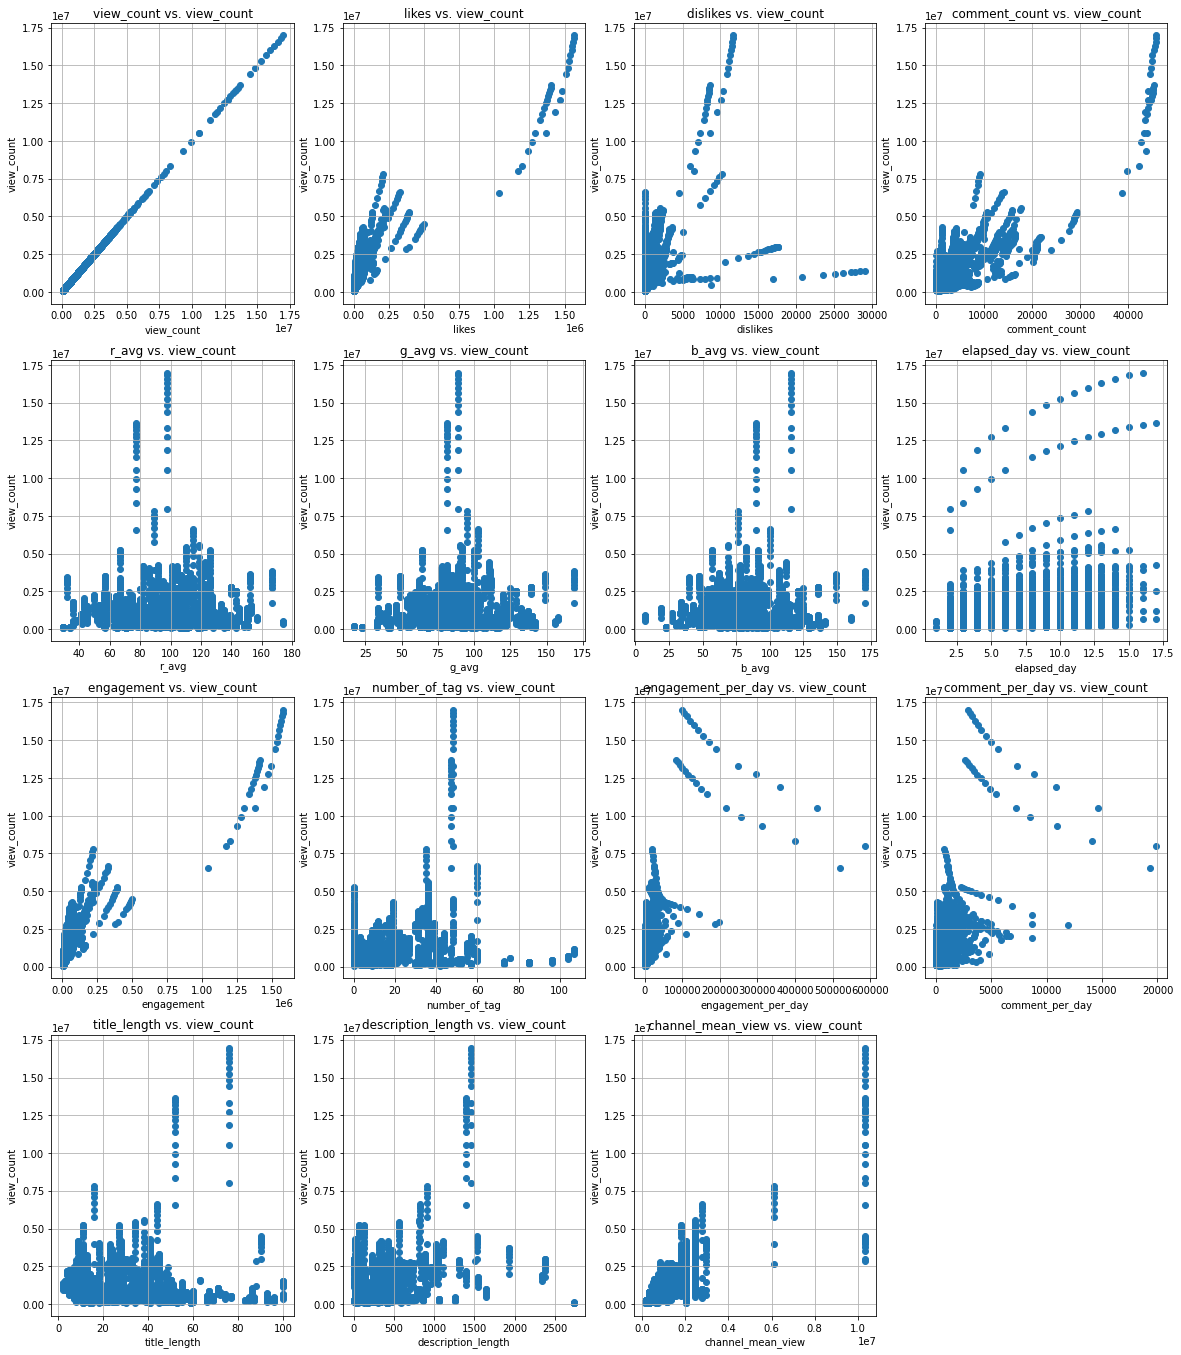

In [45]:
plt.figure(figsize=(20, 30))

for i in range(1, len(df.describe().columns)):
    plt.subplot(5, 4, i)
    title = str(df.describe().columns[i]) + ' vs. view_count'
    plt.title(title)
    plt.xlabel(df.describe().columns[i])
    plt.ylabel('view_count')
    plt.grid()
    plt.scatter(df[df.describe().columns[i]], df['view_count'])  

In [46]:
list(df)

['video_id',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description',
 'publish_date',
 'trend_date',
 'r_avg',
 'g_avg',
 'b_avg',
 'elapsed_day',
 'engagement',
 'number_of_tag',
 'engagement_per_day',
 'comment_per_day',
 'title_length',
 'description_length',
 'channel_mean_view']

In [47]:
features = ['likes', 'dislikes', 'comment_count', 'r_avg', 'g_avg', 'b_avg', 'elapsed_day', 'number_of_tag',
            'engagement_per_day', 'comment_per_day',
            'description_length', 'title_length', 'channel_mean_view']

                    likes  dislikes  comment_count  r_avg  g_avg  b_avg  \
likes                 1.0       NaN            NaN    NaN    NaN    NaN   
dislikes              NaN       1.0            NaN    NaN    NaN    NaN   
comment_count         NaN       NaN            1.0    NaN    NaN    NaN   
r_avg                 NaN       NaN            NaN    1.0    NaN    NaN   
g_avg                 NaN       NaN            NaN    NaN    1.0    NaN   
b_avg                 NaN       NaN            NaN    NaN    NaN    1.0   
elapsed_day           NaN       NaN            NaN    NaN    NaN    NaN   
number_of_tag         NaN       NaN            NaN    NaN    NaN    NaN   
engagement_per_day    NaN       NaN            NaN    NaN    NaN    NaN   
comment_per_day       NaN       NaN            NaN    NaN    NaN    NaN   
description_length    NaN       NaN            NaN    NaN    NaN    NaN   
title_length          NaN       NaN            NaN    NaN    NaN    NaN   
channel_mean_view     NaN

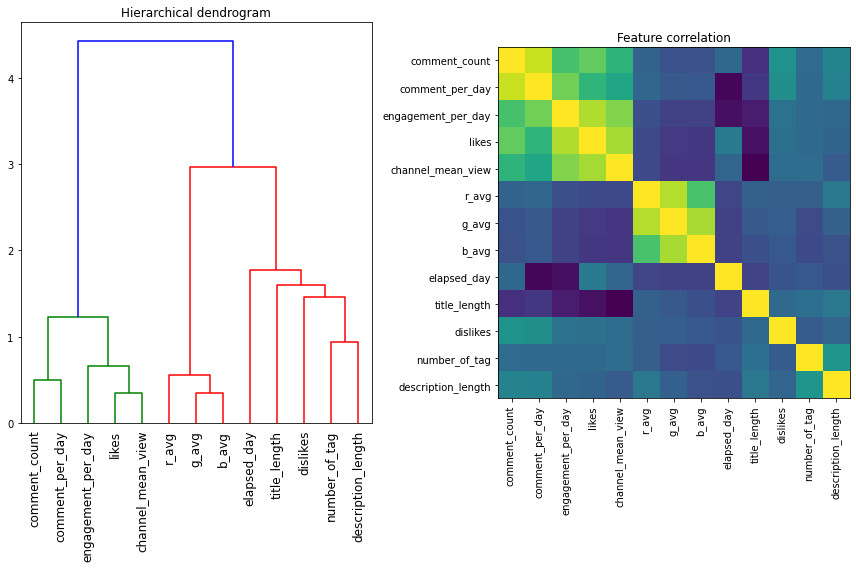

In [48]:
X_input = df[features]
cor_table = X_input.corr()

print(cor_table[cor_table > 0.9])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.set_title('Hierarchical dendrogram')
corr = spearmanr(X_input).correlation
pd.DataFrame(corr)
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=features, ax=ax1, leaf_rotation=90)

dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_title('Feature correlation')
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])

fig.tight_layout()

In [49]:
y_output = df['view_count']

X_train, X_test, y_train, y_test = train_test_split(X_input, y_output, random_state=42)

---

In [50]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [51]:
model_name = []
train_perf = []
test_perf = []

In [52]:
len(X_train)

2835

Fitting 5 folds for each of 1900 candidates, totalling 9500 fits
Best_estimator: ElasticNet(alpha=0.0008, l1_ratio=0.9900000000000001, max_iter=100000000,
           random_state=42, tol=0.0316)
Best_params: {'alpha': 0.0008, 'l1_ratio': 0.9900000000000001, 'tol': 0.0316}
Best_score: 0.8891281687824488
Train score: 0.8863029268286335
Test score: 0.8173174930927493


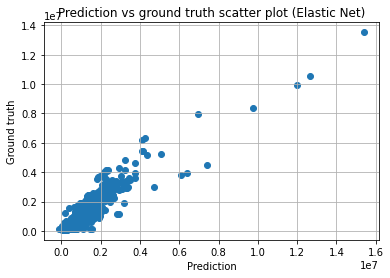

In [53]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ 23 ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïôÏäµÎç∞Ïù¥ÌÑ∞(2835Í∞ú) : Ïã§Ìñâ ÏãúÍ∞Ñ 44Ï¥à ÏÜåÏöî

en_model = ElasticNet(max_iter=100000000, random_state=42)

en_param = {
    'l1_ratio': np.arange(0.9, 0.995, 0.005),
    'alpha': np.arange(0.0008, 0.0028, 0.0001),
    'tol': [1e-2, 3.16e-2, 1e-1, 3.16e-1, 1e0]
}

clf = GridSearchCV(estimator=en_model, param_grid=en_param, n_jobs=-1, verbose=3)

clf.fit(X_train_scaled, y_train)
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

print('Best_estimator:', clf.best_estimator_)
print('Best_params:', clf.best_params_)
print('Best_score:', clf.best_score_)

train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test score:', test_score)

model_name.append('Elastic Net')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (Elastic Net)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test);

In [54]:
en_model = ElasticNet(alpha=0.0008, l1_ratio=0.9900000000000001, tol=0.0316, max_iter=100000000, random_state=42)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best_estimator: RandomForestRegressor(max_depth=30, n_estimators=76, n_jobs=-1, random_state=42)
Best_params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 76}
Best_score: 0.9861646311295796
Train score: 0.9986441106996253
Test  score: 0.9890824685079341


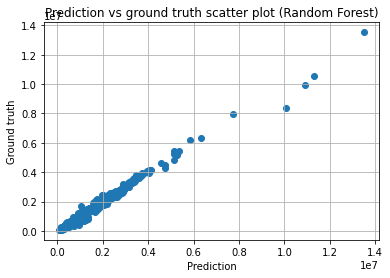

In [55]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ 23 ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïôÏäµÎç∞Ïù¥ÌÑ∞(2835Í∞ú) : Ïã§Ìñâ ÏãúÍ∞Ñ 2Î∂Ñ 56Ï¥à ÏÜåÏöî

rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)

rf_param = {'n_estimators': range(76, 136, 20),
            'max_depth': range(30, 42, 4),
            'min_samples_split': range(2, 5, 1)}

clf = GridSearchCV(estimator=rf_model, param_grid=rf_param, n_jobs=-1, verbose=2)

clf.fit(X_train_scaled, y_train)
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

print('Best_estimator:', clf.best_estimator_)
print('Best_params:', clf.best_params_)
print('Best_score:', clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', test_score)

model_name.append('Random Forest')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (Random Forest)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test);

In [56]:
rf_model = RandomForestRegressor(n_estimators=76, max_depth=30, min_samples_split=2, n_jobs=-1, random_state=42)

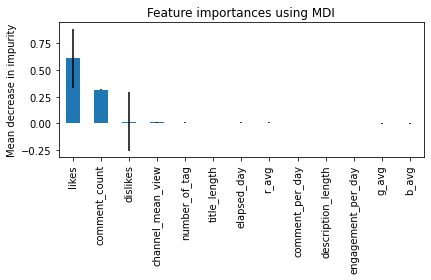

In [57]:
rf_model.fit(X_train_scaled, y_train)

feature_names = ['feature {i}' for i in range(X_train_scaled.shape[1])]

importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

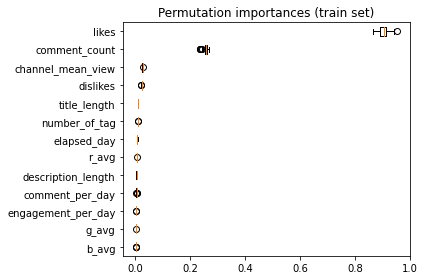

In [58]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ 23 ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïôÏäµÎç∞Ïù¥ÌÑ∞(2835Í∞ú) : Ïã§Ìñâ ÏãúÍ∞Ñ 1Î∂Ñ 14Ï¥à ÏÜåÏöî

result = permutation_importance(rf_model, X_train_scaled, y_train, n_repeats=100, n_jobs=-1, random_state=42)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation importances (train set)")
fig.tight_layout()

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[02:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best_estimator: XGBRegressor(max_depth=4, n_estimators=120, n_jobs=-1, random_state=42,
             reg_alpha=0.01)
Best_params: {'max_depth': 4, 'n_estimators': 120, 'reg_alpha': 0.01, 'reg_lambda': 1}
Best_score: 0.9828879160877211
Train score: 0.9935711238036457
Test  score: 0.9796042855812146


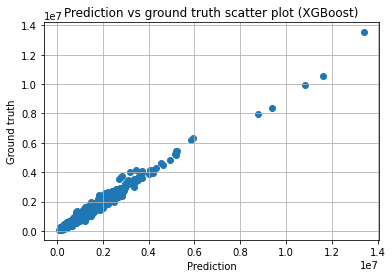

In [59]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ 23 ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïôÏäµÎç∞Ïù¥ÌÑ∞(2835Í∞ú) : Ïã§Ìñâ ÏãúÍ∞Ñ 33Ï¥à ÏÜåÏöî

xgb_model = XGBRegressor(n_jobs=-1, random_state=42)

xgb_param = {'n_estimators': range(80, 140, 20),
             'max_depth': range(2, 5, 1),
             'reg_alpha': [1e-2, 3.16e-2, 1e-1],
             'reg_lambda': [0.1, 0.316, 1]}

xgb_clf = GridSearchCV(estimator=xgb_model, param_grid=xgb_param, n_jobs=-1, verbose=2, cv=3)

xgb_clf.fit(X_train_scaled, y_train)
y_train_pred = xgb_clf.predict(X_train_scaled)
y_test_pred = xgb_clf.predict(X_test_scaled)

print('Best_estimator:', xgb_clf.best_estimator_)
print('Best_params:', xgb_clf.best_params_)
print('Best_score:', xgb_clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', test_score)

model_name.append('XGBoost')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (XGBoost)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test);

In [60]:
xgb_model = XGBRegressor(max_depth=4, n_estimators=120, reg_alpha=0.01, reg_lambda=1, n_jobs=-1, random_state=42)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best_estimator: SVR(C=100000000.0, gamma=0.316)
Best_params: {'C': 100000000.0, 'gamma': 0.316}
Best_score: 0.9545894093839479
Train score: 0.9604391731220492
Test  score: 0.9263928418618677


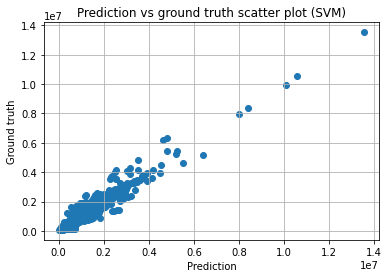

In [61]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ 23 ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïôÏäµÎç∞Ïù¥ÌÑ∞(2835Í∞ú) : Ïã§Ìñâ ÏãúÍ∞Ñ 39Ï¥à ÏÜåÏöî

svr_model = SVR()

svr_param = {'C': [3.16e7, 1e8],
             'gamma': [0.1, 0.316]}

svr_clf = GridSearchCV(estimator=svr_model, param_grid=svr_param, n_jobs=-1, verbose=3, cv=3)

svr_clf.fit(X_train_scaled, y_train)
y_train_pred = svr_clf.predict(X_train_scaled)
y_test_pred = svr_clf.predict(X_test_scaled)

print('Best_estimator:', svr_clf.best_estimator_)
print('Best_params:', svr_clf.best_params_)
print('Best_score:', svr_clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', test_score)

model_name.append('SVM')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (SVM)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test);

In [62]:
svr_model = SVR(C=100000000.0, gamma=0.316)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best_estimator: KNeighborsRegressor(leaf_size=1, n_jobs=-1, n_neighbors=2, weights='distance')
Best_params: {'leaf_size': 1, 'n_neighbors': 2, 'weights': 'distance'}
Best_score: 0.972756149647101
Train score: 1.0
Test  score: 0.9774574366031782


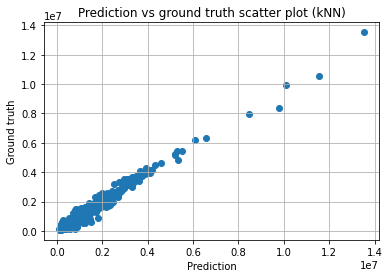

In [63]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ 23 ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïôÏäµÎç∞Ïù¥ÌÑ∞(2835Í∞ú) : Ïã§Ìñâ ÏãúÍ∞Ñ 12Ï¥à ÏÜåÏöî

knn_model = KNeighborsRegressor(n_jobs=-1)

knn_param = {'n_neighbors': range(1, 6, 1),
             'weights': ['uniform', 'distance'],
             'leaf_size': range(1, 5, 1)}

knn_clf = GridSearchCV(estimator=knn_model, param_grid=knn_param, n_jobs=-1, verbose=3)

knn_clf.fit(X_train_scaled, y_train)
y_train_pred = knn_clf.predict(X_train_scaled)
y_test_pred = knn_clf.predict(X_test_scaled)

print('Best_estimator:', knn_clf.best_estimator_)
print('Best_params:', knn_clf.best_params_)
print('Best_score:', knn_clf.best_score_)
train_score = r2_score(y_train_pred, y_train)
print('Train score:', r2_score(y_train_pred, y_train))
test_score = r2_score(y_test_pred, y_test)
print('Test  score:', r2_score(y_test_pred, y_test))


model_name.append('kNN')
train_perf.append(train_score)
test_perf.append(test_score)

plt.title('Prediction vs ground truth scatter plot (kNN)')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.grid()
plt.scatter(y_test_pred, y_test);

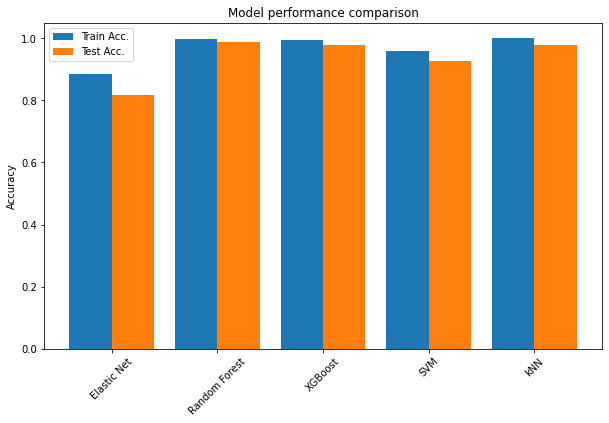

In [64]:
plt.figure(figsize=(10,6))
plt.title('Model performance comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

x = np.arange(len(model_name))
plt.xticks(x, model_name)
plt.bar(x - 0.2, train_perf, width=0.4, label='Train Acc.');
plt.bar(x + 0.2, test_perf, width=0.4, label='Test Acc.');
plt.legend();

In [65]:
pd.DataFrame({
    'model_name': model_name,
    'test_perf': test_perf
}).sort_values(by='test_perf', ascending=False)

model_name  test_perf
1  Random Forest   0.989082
2        XGBoost   0.979604
4            kNN   0.977457
3            SVM   0.926393
0    Elastic Net   0.817317

1 Ensemble train score: 0.9986441106996253
1 Ensemble test  score: 0.9890824685079341
2 Ensemble train score: 0.9973963717006878
2 Ensemble test  score: 0.987195464942993
3 Ensemble train score: 0.9948643155451316
3 Ensemble test  score: 0.9804611375386876
4 Ensemble train score: 0.9914540085915
4 Ensemble test  score: 0.9762226084865466
5 Ensemble train score: 0.9838166946770015
5 Ensemble test  score: 0.9625215513901084


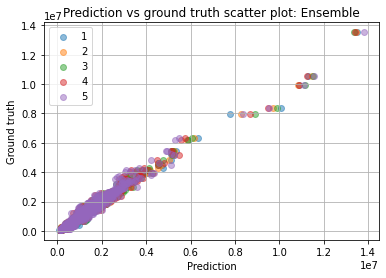

In [66]:
ensemble_list = [('rf', rf_model),('xgb', xgb_model), ('knn', knn_model), ('svm', svr_model), ('en', en_model)]

voting_est = []

for idx, target_model in enumerate(ensemble_list):
    voting_est.append(target_model)

    voting_clf = VotingRegressor(estimators=voting_est, n_jobs=-1)
    voting_clf.fit(X_train_scaled, y_train)
    y_train_pred = voting_clf.predict(X_train_scaled)
    y_test_pred = voting_clf.predict(X_test_scaled)
    print(idx + 1, 'Ensemble train score:', r2_score(y_train_pred, y_train))
    print(idx + 1, 'Ensemble test  score:', r2_score(y_test_pred, y_test))

    plt.scatter(y_test_pred, y_test, label=str(idx + 1), alpha=0.5)
    title = 'Prediction vs ground truth scatter plot: Ensemble'     
    plt.title(title)
    plt.xlabel('Prediction')
    plt.ylabel('Ground truth')
    plt.grid()
    plt.legend()

In [67]:
voting_clf = VotingRegressor(estimators=[('rf', rf_model),('xgb', xgb_model), ('knn', knn_model), ('svm', svr_model), ('en', en_model)], n_jobs=-1)
voting_clf.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=30,
                                                   n_estimators=76, n_jobs=-1,
                                                   random_state=42)),
                            ('xgb',
                             XGBRegressor(max_depth=4, n_estimators=120,
                                          n_jobs=-1, random_state=42,
                                          reg_alpha=0.01)),
                            ('knn', KNeighborsRegressor(n_jobs=-1)),
                            ('svm', SVR(C=100000000.0, gamma=0.316)),
                            ('en',
                             ElasticNet(alpha=0.0008,
                                        l1_ratio=0.9900000000000001,
                                        max_iter=100000000, random_state=42,
                                        tol=0.0316))],
                n_jobs=-1)

---

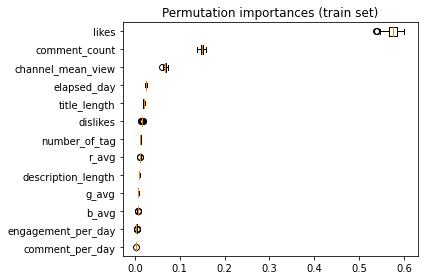

In [68]:
# Ïπ¥ÌÖåÍ≥†Î¶¨ 23 ÏµúÍ∑º 1ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïôÏäµÎç∞Ïù¥ÌÑ∞(2835Í∞ú) : Ïã§Ìñâ ÏãúÍ∞Ñ 14Î∂Ñ 6Ï¥à ÏÜåÏöî

result = permutation_importance(voting_clf, X_train_scaled, y_train, n_repeats=100, n_jobs=-1, random_state=42)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation importances (train set)")
fig.tight_layout()

---